In [2]:

import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib qt

In [12]:

os.chdir("D:/222experiment_material/EEG_DATA")   #修改当前工作目录
print(os.getcwd()) #获取当前工作目录
# file_path = './practice/wx_lkm/wx.mff'
# file_path = './practice/lkm_p/pain_{0}.mff'.format(2)
file_path = './practice/lkm_p_raw/pain_2.mff'

D:\222experiment_material\EEG_DATA


Reading EGI MFF Header from D:\222experiment_material\EEG_DATA\practice\lkm_p_raw\pain_2.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {pain} ...


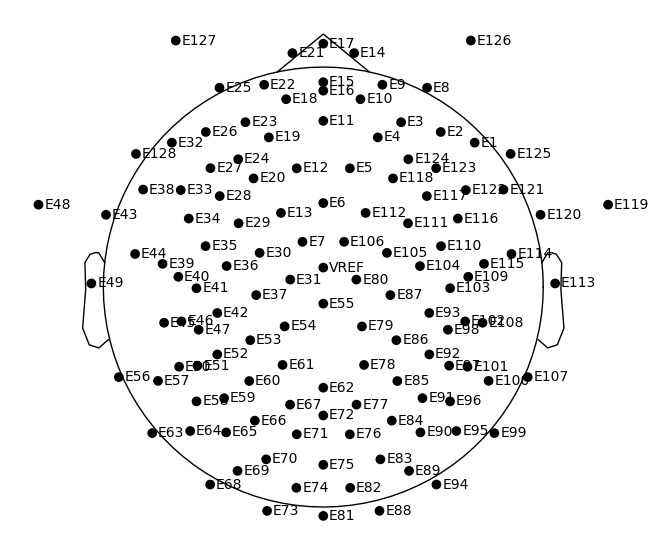

Channels marked as bad:
none


In [13]:
# 读取数据
raw = mne.io.read_raw_egi(file_path)
raw.info
raw.plot()

raw.plot_sensors(ch_type = 'eeg', show_names = True)

In [5]:
# 可视化电极
#raw.plot_sensors(ch_type = 'eeg', show_names = True)
# 设置通道类型
# raw.pick_types(meg=False, eeg=True, stim=False, eog=False, exclude='bads')

# #定位电极
# montage = mne.channels.make_standard_montage("standard_1020")
# raw.set_montage(montage, match_case=False)
# raw.pick(picks = 'all',exclude= ['VREF'])
# raw.plot(start = 0, duration = 1)

# raw.pick(picks = 'all',exclude= ['VREF'])
# raw.plot(start = 0, duration = 1)

# plt.show()

# 滤波
raw_filter = raw.copy()
raw_filter.load_data()
raw_filter.filter(l_freq=0.1, h_freq=30)
raw_filter.notch_filter(freqs=50)
plt.show(block=True)
raw_filter.plot(start=20, duration=1, block=True, title='滤波完成，准备ICA，无误请关闭窗口')









Reading 0 ... 514693  =      0.000 ...   514.693 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    2.8s finished


Channels marked as bad:
none


KeyboardInterrupt: 

In [6]:

raw_filter.info

# 降采样率
raw_filter.resample(sfreq=250)

126 events found
Event IDs: [1 2 3 4]
126 events found
Event IDs: [1 2 3 4]


<RawMff | signal1.bin, 135 x 128674 (514.7 s), ~132.7 MB, data loaded>

In [10]:
# 数据分段

event = mne.find_events(raw_filter, stim_channel='STI 014')
oppa = mne.find_events(raw_filter, stim_channel='onpa')
onno = mne.find_events(raw_filter, stim_channel='onno')

# 判断刺激标签
if oppa[0,2] < onno[0,2]:
    events_id = {
    'stat' : 1,
    'onpa' : 2,
    'onno' : 3,
    'rest' : 4  
}
else:
    events_id = {
    'stat' : 1,
    'onno' : 2,
    'onpa' : 3,
    'rest' : 4  
}

# mne.viz.plot_events(events)

events = [event,events_id]




126 events found
Event IDs: [1 2 3 4]
60 events found
Event IDs: [4]
60 events found
Event IDs: [3]


array([[ 14958,      0,      1],
       [ 15092,      0,      2],
       [ 15860,      0,      3],
       [ 16643,      0,      3],
       [ 17427,      0,      2],
       [ 18214,      0,      2],
       [ 19473,      0,      3],
       [ 20232,      0,      3],
       [ 20989,      0,      2],
       [ 21767,      0,      3],
       [ 22559,      0,      2],
       [ 23343,      0,      3],
       [ 24109,      0,      2],
       [ 24893,      0,      3],
       [ 25688,      0,      3],
       [ 26586,      0,      2],
       [ 27338,      0,      3],
       [ 28105,      0,      3],
       [ 28884,      0,      3],
       [ 29639,      0,      3],
       [ 30401,      0,      2],
       [ 31143,      0,      2],
       [ 31918,      0,      3],
       [ 32696,      0,      3],
       [ 33440,      0,      2],
       [ 34213,      0,      3],
       [ 35122,      0,      3],
       [ 35920,      0,      2],
       [ 36668,      0,      3],
       [ 37422,      0,      2],
       [ 3

In [36]:
event_dict = {'no_pain': events[1]['onno'], 'pain': events[1]['onpa']}
reject_criteria = dict(eeg=100e-6)  # 100 µV
epochs = mne.Epochs(raw_filter, events[0], event_id=event_dict, preload=True,
                    tmax=1, tmin=-0.2)# 运行中基线校正自动进行了,先不拒绝100μv
epochs.plot(events=events[0], block=True, title='请挑出坏的Epochs')

Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 301 original time points ...
0 bad epochs dropped
Dropped 8 epochs: 0, 40, 64, 95, 106, 117, 118, 119
The following epochs were marked as bad and are dropped:
[1, 43, 67, 100, 111, 122, 123, 124]
Channels marked as bad:
none


KeyboardInterrupt: 

In [38]:
# 查看坏导
epoch_bad = epochs.copy()   # 备份原数据
epoch_bad.plot(block=True,title = '请选出坏导')
epoch_bad.info['bads']

[]

Dropped 15 epochs: 13, 23, 24, 29, 32, 37, 41, 48, 52, 58, 60, 70, 75, 76, 88
The following epochs were marked as bad and are dropped:
[15, 25, 26, 31, 34, 39, 46, 53, 57, 63, 65, 76, 81, 82, 96]
Channels marked as bad:
['E8', 'E2', 'E7', 'E13', 'E56', 'E73', 'E88', 'E119', 'E118', 'E117', 'E126', 'E125', 'E127', 'E99', 'E87', 'E112', 'E95', 'E106', 'E107', 'E80', 'E81', 'E6', 'E31', 'E55']


C:\Users\Hsukin\AppData\Local\Temp\ipykernel_18960\2365406712.py:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epoch_bad.interpolate_bads( )


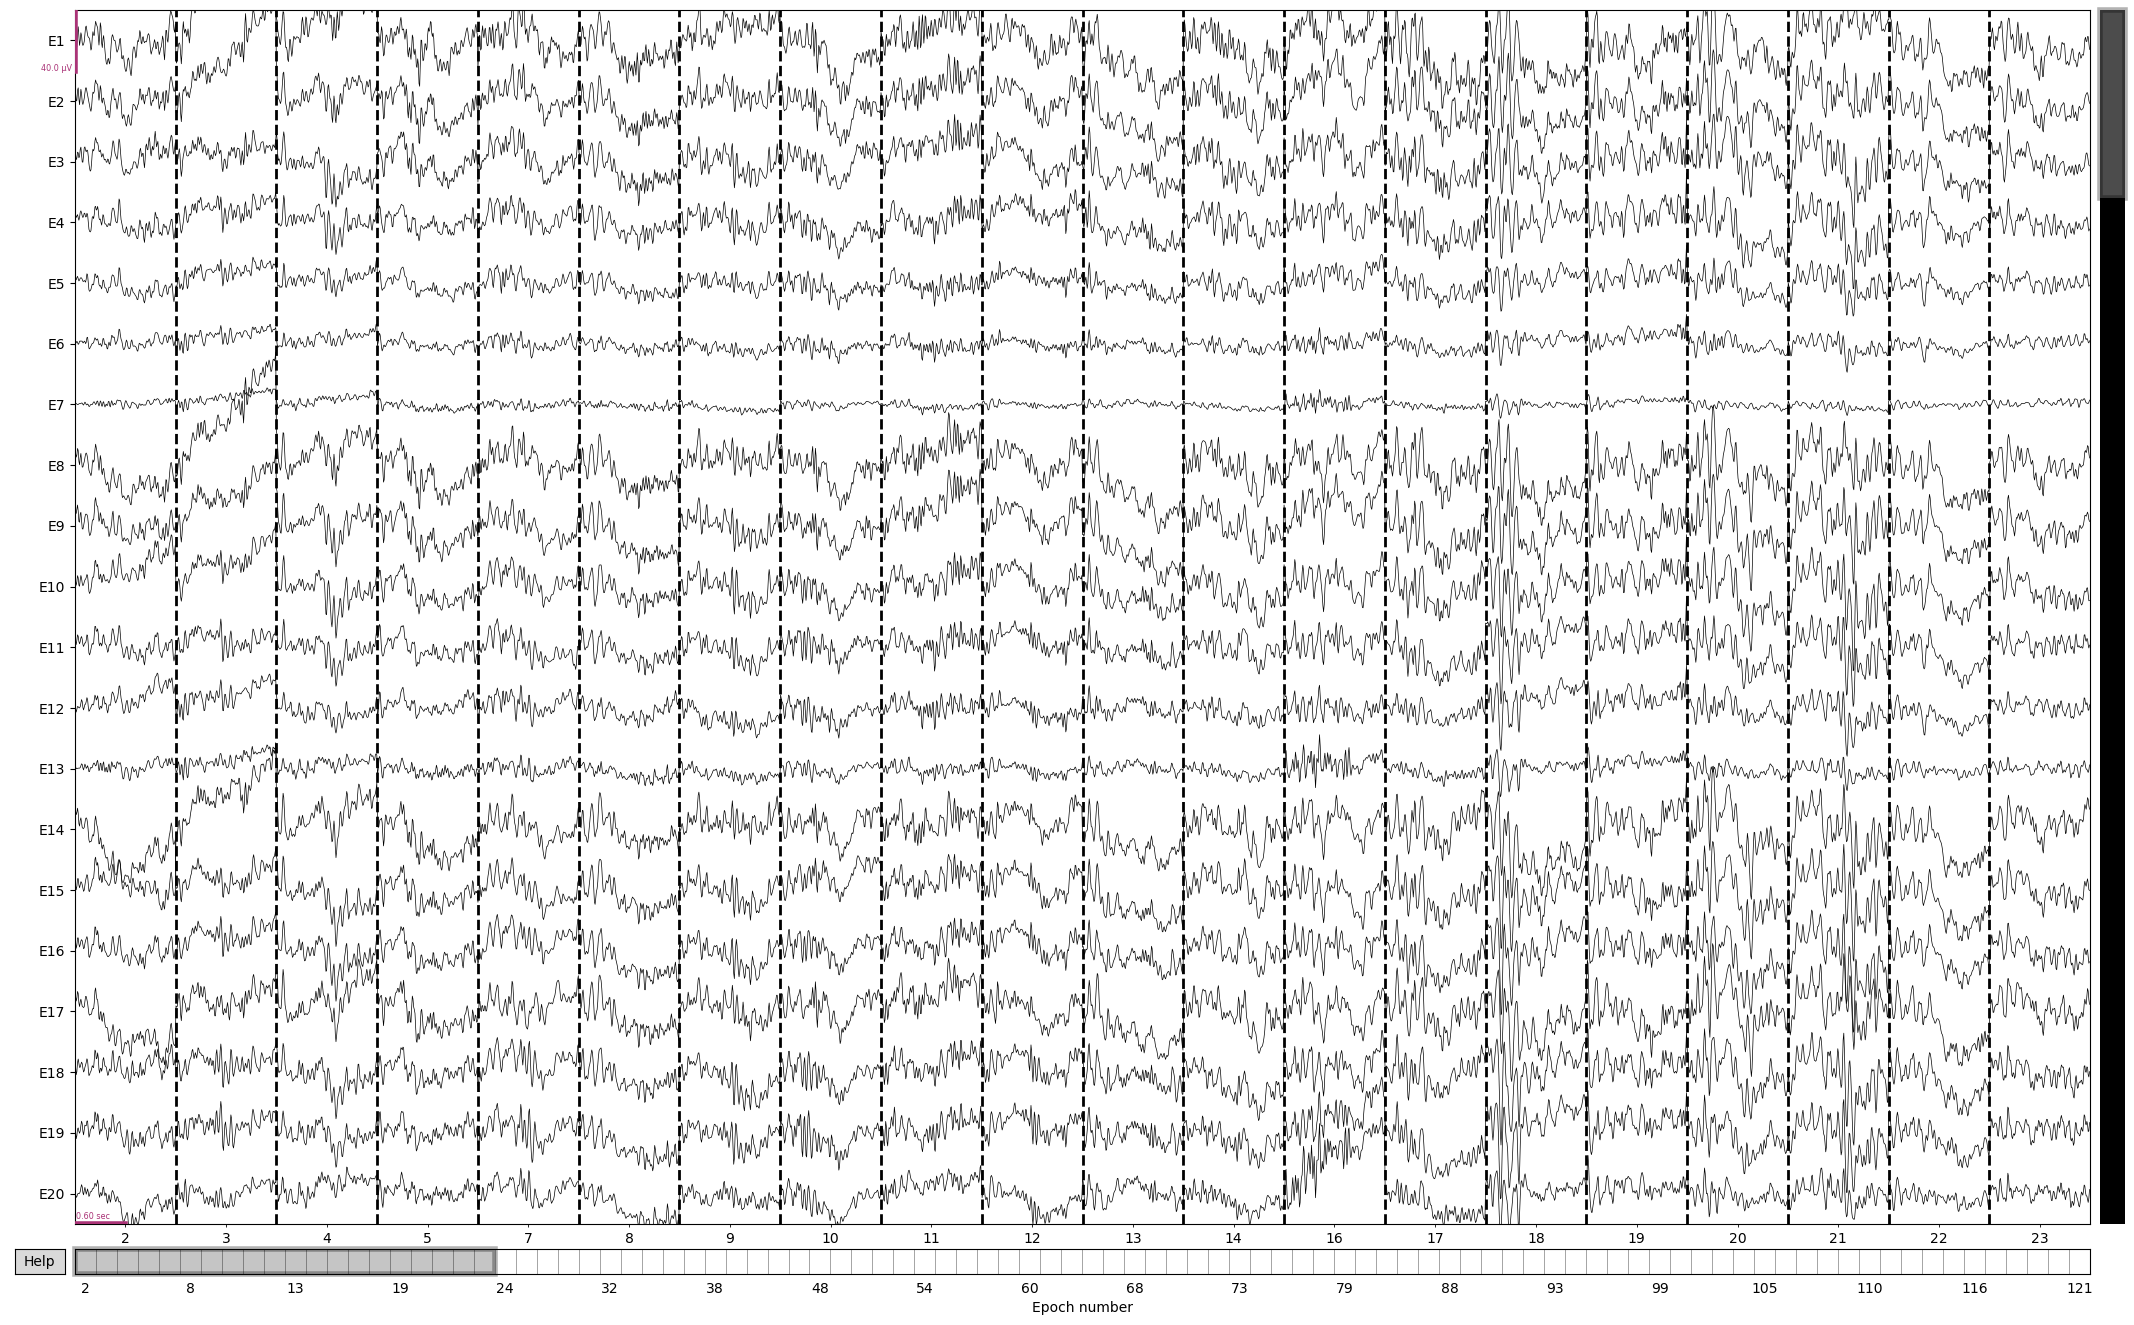

Dropped 2 epochs: 12, 13
The following epochs were marked as bad and are dropped:
[16, 17]
Channels marked as bad:
['E43', 'E55', 'E112']


In [40]:

# 插值坏导
epoch_bad.load_data()
epoch_bad.interpolate_bads( )
epoch_bad.plot(title = '坏导插值完成')

Interpolating bad channels
    Automatic origin fit: head of radius 99.1 mm
Computing interpolation matrix from 126 sensor positions
Interpolating 3 sensors


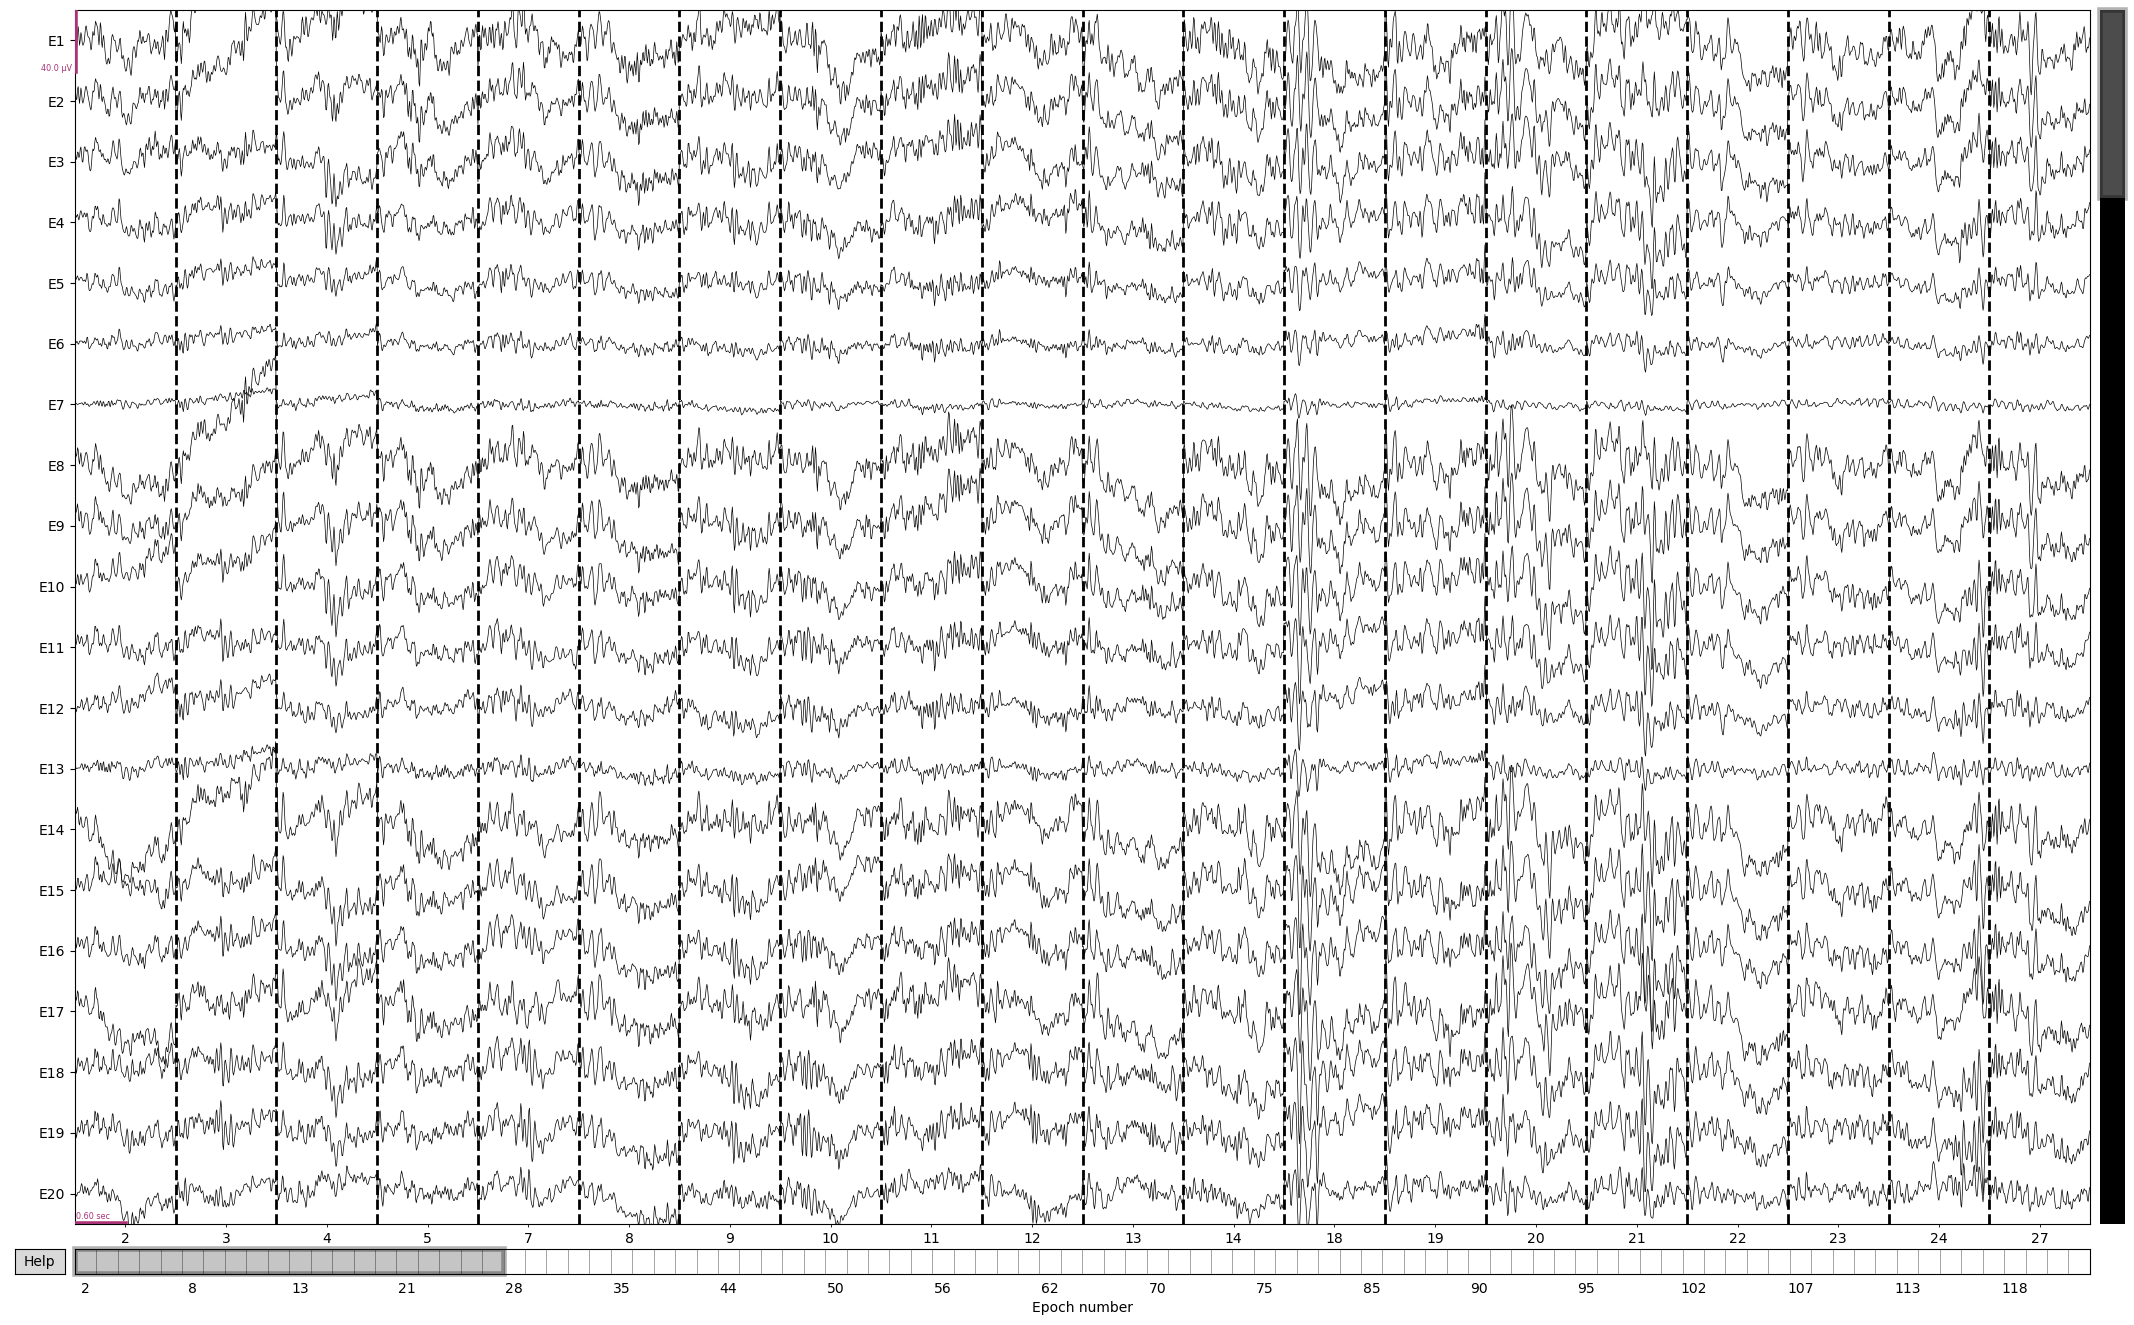

Dropped 1 epoch: 12
The following epochs were marked as bad and are dropped:
[18]
Channels marked as bad:
none


In [41]:
epoch_bad.load_data()
epoch_bad.interpolate_bads( )
epoch_bad.plot(title = '坏导插值完成')


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


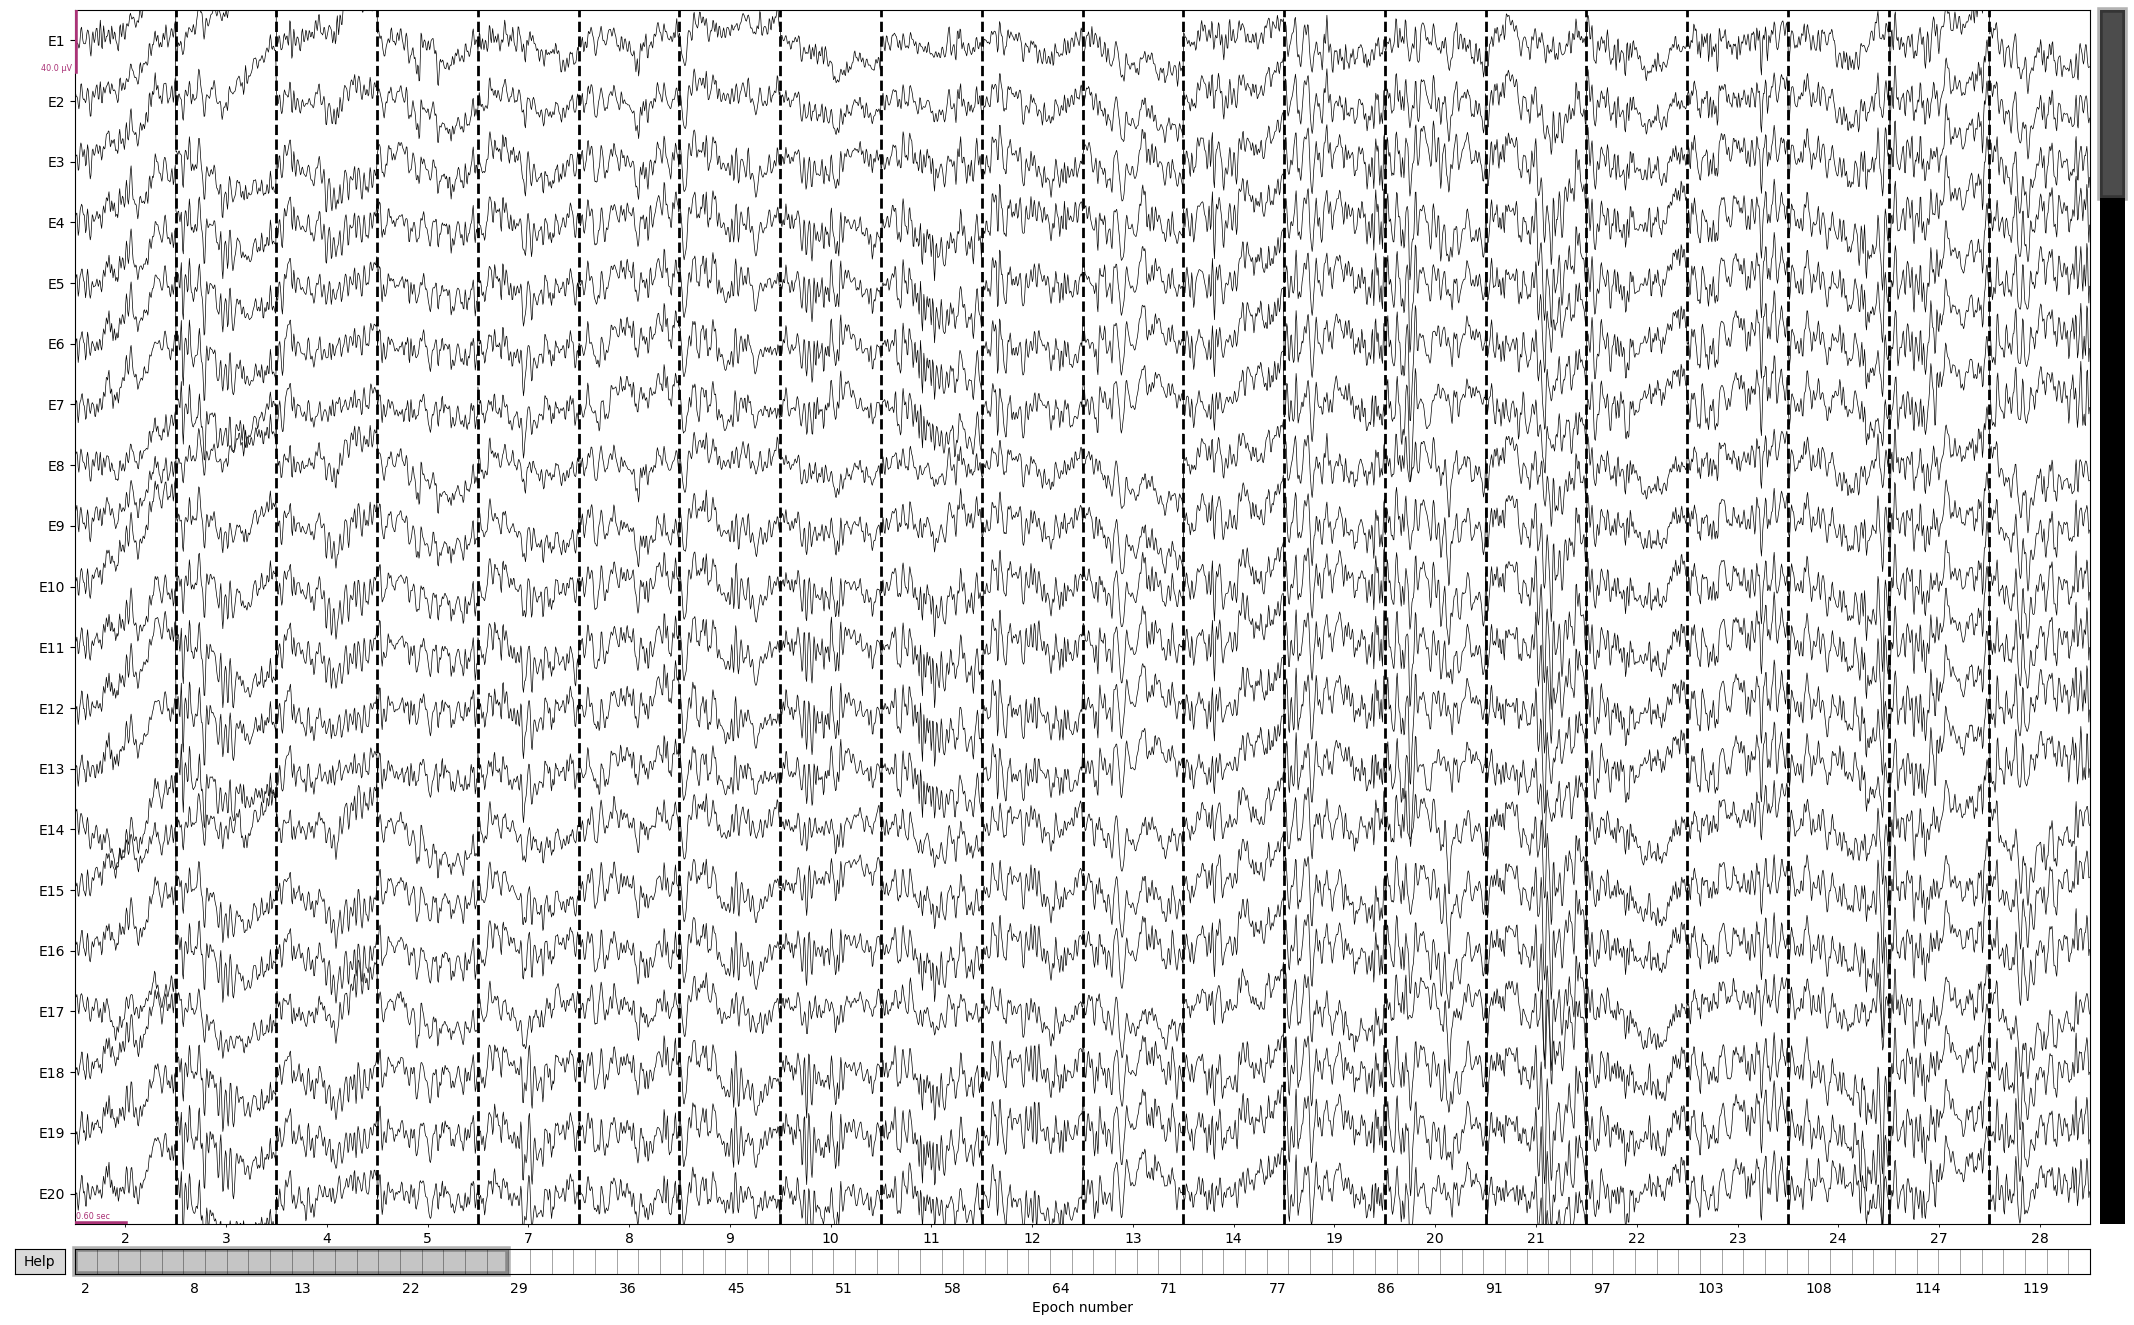

Dropped 6 epochs: 14, 41, 42, 55, 56, 92
The following epochs were marked as bad and are dropped:
[21, 59, 60, 77, 78, 121]
Channels marked as bad:
none


In [42]:
#重参考
epoch_reference = epoch_bad.copy()
epoch_reference.load_data()
epoch_reference.set_eeg_reference(ref_channels=['E57','E100'])
epoch_reference.plot( block=True,title='重参考完成，无误请关闭窗口')


In [43]:
# ICA _ 1
ica = mne.preprocessing.ICA(n_components=10, method='fastica', max_iter=800)
ica.fit(epoch_reference)
epoch_reference.load_data()
ica.plot_components()
#ica.plot_properties(raw, picks= [0,1,2,3,4,5,6,7,8,9])
ica.plot_sources(epoch_reference, show_scrollbars=False, title='选择需要去除的成分')
plt.show(block=True)


Fitting ICA to data using 129 channels (please be patient, this may take a while)


C:\Users\Hsukin\AppData\Local\Temp\ipykernel_18960\16409162.py:3: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epoch_reference)


Selecting by number: 10 components
Fitting ICA took 2.1s.
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated


KeyboardInterrupt: 

In [45]:
# ICA_2
epoch_ica = epoch_reference.copy()
epoch_ica = ica.apply(epoch_ica)
epoch_reference.plot( title='ICA处理前, 确认请关闭')
epoch_ica.plot( title='ICA处理后, 确认请关闭')
plt.show(block=True)

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 129 PCA components


C:\Users\Hsukin\AppData\Local\Temp\ipykernel_18960\3105886954.py:3: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epoch_ica = ica.apply(epoch_ica)


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


KeyboardInterrupt: 

In [49]:

#剔除最后的坏段
epoch_final = epoch_ica.drop_bad(reject = reject_criteria )# 运行中基线校正自动进行了,先不拒绝100μv)# 运行中基线校正自动进行了,先不拒绝100μv

    Rejecting  epoch based on EEG : ['E25', 'E68', 'E73', 'E81', 'E88', 'E94', 'E99', 'E107', 'E119', 'E120', 'E121']
    Rejecting  epoch based on EEG : ['E1', 'E2', 'E3', 'E8', 'E9', 'E10', 'E14', 'E15', 'E16', 'E17', 'E21', 'E22', 'E25', 'E49', 'E56', 'E126', 'E127']
    Rejecting  epoch based on EEG : ['E114']
    Rejecting  epoch based on EEG : ['E68', 'E81', 'E88', 'E94', 'E99']
    Rejecting  epoch based on EEG : ['E94']
    Rejecting  epoch based on EEG : ['E1', 'E2', 'E3', 'E4', 'E8', 'E9', 'E10', 'E11', 'E14', 'E15', 'E16', 'E17', 'E18', 'E21', 'E22', 'E23', 'E25', 'E26', 'E123', 'E124', 'E126', 'E127']
    Rejecting  epoch based on EEG : ['E1', 'E2', 'E3', 'E4', 'E8', 'E9', 'E10', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E21', 'E22', 'E23', 'E25', 'E32', 'E99', 'E107', 'E113', 'E119', 'E123', 'E125', 'E126', 'E127']
    Rejecting  epoch based on EEG : ['E25']
    Rejecting  epoch based on EEG : ['E8', 'E9', 'E14', 'E15', 'E17', 'E21', 'E22', 'E25']
    Rejecting  epoch bas

In [53]:

# 第九步：条件平均、可视化
# 对两个condition的epochs做平均
# epochs.equalize_event_counts(['pos','neg']) 是否需要将两个condition一一对应？？
no_epochs = epoch_final['no_pain']
pain_epochs = epoch_final['pain']
onno = no_epochs.average()
onpa = pain_epochs.average()

evokes_dict = {
    'pain' :onpa ,
    'no_pain' : onno
}
# figpa=evokes_dict['pain'].plot(window_title='疼')
# fignp=evokes_dict['no_pain'].plot(window_title='不疼')



# 呈现图
# ax.fill_between(l_aud.times, gfp * 1e6, color='lime', alpha=0.2)
# ax.set(xlabel='Time (s)', ylabel='GFP (µV)', title='EEG')

mne.viz.plot_compare_evokeds(dict( pain = onpa, no_pain= onno), combine='mean', picks=np.arange(128),
                             invert_y=True, legend=True, ci=True)

plt.show(block=True)


More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


KeyboardInterrupt: 

In [54]:
epoch_final.save('2_epo.fif')
# no_evoked.save('nopa_ave.fif')
# pain_evoked.save('pain_ave.fif')

In [32]:
# 导出数据
long_df = epoch_final.to_data_frame(time_format=None, index='condition',
                               long_format=True)
long_df.head()




TypeError: 'EvokedArray' object is not subscriptable

In [36]:
# tevoke['onno'].plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)
# # evokes_dict['no_pain'].plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)
# for evk in (onno, onpa):
#     evk.plot(gfp=True, spatial_colors=True, ylim=dict(eeg=[-12, 12]))

AttributeError: 'EvokedArray' object has no attribute 'time'